# Actividad 1: Homogenización de Datos

**Asignatura:** Big Data Aplicado.
**Estudiante:** Byron V. Blatch Rodríguez.
**Fecha:** 25/11/2025

## Objetivos de la actividad
1. Tomar un Dataset sobre la populación mundial y homogenizar los datos que se encuentran en tal dataset.
2. Comprender la importancia de la homogenización, proceso natural en el análisis de cualquier base de datos.


> En esta ocasión he tomado el dataset de world-population-dataset de iamsouravbanerjee publicado en kaggle mediante el siguiente enlace: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset 
---

In [1]:
# Primeramente importo las librerías que utilizaré para esta actividad.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de visualización (una buena práctica al trabajar con Jupyter Notebooks).
# Esto hace que los gráficos se vean bien integrados y con estilo limpio
%matplotlib inline
plt.style.use('ggplot')

# Esta configuración de pandas me ayudará a ver todas las columnas si el df es ancho
pd.set_option('display.max_columns', None)

Una vez configurado las librerías que se usarán en esta actividad procederé a cargar el dataset.

In [2]:
# Cargo el dataset desde un archivo CSV.
df = pd.read_csv('data/world_population.csv')

# Muestro las primeras filas del dataset para entender su estructura.
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Se puede observar que el dataset fue cargado exitosamente. 

Destaco que para la homogenización de datos, deseo utilizar aquellos que contiene mi país de nacimiento: Venezuela. Por ello de momento me enfocaré en ello.

In [3]:
# Primeramente filtraré los datos para quedarme solo con los de Venezuela.

vnzla_data = df[df['Country/Territory'] == 'Venezuela']

# Me aseguro de que el dato fue correctamente filtrado mostrando las primeras filas.
vnzla_data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
227,51,VEN,Venezuela,Caracas,South America,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.882,1.0036,0.35


In [4]:
# Tomaré ahora las columnas que son de mi interés. Es decir, Contry/Territory y Year-Population.

columnas_interes = ['Country/Territory', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
vnzla_poblacion = vnzla_data[columnas_interes]
vnzla_poblacion.head()

,Country/Territory,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
227,Venezuela,24427729,28715022,30529716,28490453,28301696


In [5]:
# Ahora transformaré el DataFrame para que las columnas de años se conviertan en filas (hacer un melt).

vnzla_poblacion_melted = vnzla_poblacion.melt(id_vars=['Country/Territory'], value_vars=['2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population'], var_name='Year', value_name='Population')

# Muestro el DataFrame transformado.
vnzla_poblacion_melted.head()

,Country/Territory,Year,Population
0,Venezuela,2000 Population,24427729
1,Venezuela,2010 Population,28715022
2,Venezuela,2015 Population,30529716
3,Venezuela,2020 Population,28490453
4,Venezuela,2022 Population,28301696


In [6]:
# Y termino limpiando la columna 'Year' para que solo contenga el año como número.
vnzla_poblacion_melted['Year'] = vnzla_poblacion_melted['Year'].str.replace(' Population', '').astype(int)

vnzla_poblacion_melted.head()

,Country/Territory,Year,Population
0,Venezuela,2000,24427729
1,Venezuela,2010,28715022
2,Venezuela,2015,30529716
3,Venezuela,2020,28490453
4,Venezuela,2022,28301696


In [7]:
# Me aseguro de que los tipos de datos son correctos.
vnzla_poblacion_melted.dtypes

Country/Territory    object
Year                  int64
Population            int64
dtype: object

Sabemos que el dtype de nuestro dataset extraído es correcto, por lo que podemos proceder a la creación de gráficos con ayuda de Matplotlib.

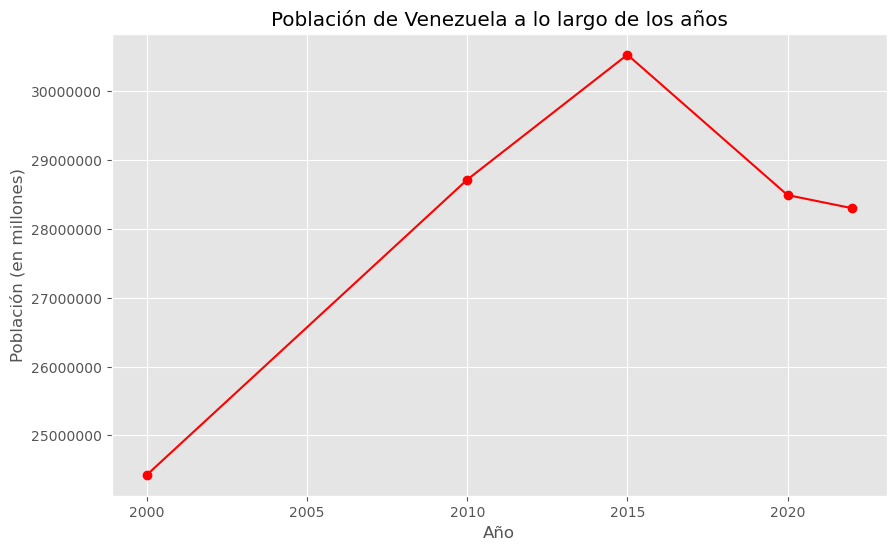

In [15]:
# Ordeno el DataFrame por año para facilitar su lectura.
df_vnzl = vnzla_poblacion_melted.sort_values(by='Year')

# Creo el gráfico de línea para visualizar la población de Venezuela a lo largo de los años.
plt.figure(figsize=(10, 6)) # Tamaño del gráfico
plt.plot(df_vnzl['Year'], df_vnzl['Population'], 'ro-')
plt.grid(True)

# Agrego títulos y etiquetas.
plt.title('Población de Venezuela a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Población (en millones)')

# Formateamos el eje y para evitar la notación científica.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Con esto representamos una gráfica simple y clásica de los datos que son de mi interés; puedo ver la evolución de la densidad de población en mi país, permitiéndome analizar, aunque no soy experto, de la situación de mi país. En la siguiente actividad quiero presentar la gráfica de manera diferente, por tanto exportaré el dataset en limpio para usarlo en el siguiente documento con el siguiente código.


In [16]:
ruta_exportacion = 'data/vnzla_population_limpio.csv'
df_vnzl.to_csv(ruta_exportacion, index=False)
print(f'Dataset exportado exitosamente a {ruta_exportacion}')

Dataset exportado exitosamente a data/vnzla_population_limpio.csv
